In [1]:
import pickle
import pandas as pd
from datetime import datetime
from pprint import pprint
from collections import defaultdict

In [2]:
symbol = 'IMB.L'

data_file = '../data/all_lse_stock_data_230108.pkl'
with open(data_file, 'rb') as file:
    all_data = pickle.load(file)

data = all_data[symbol]
del(all_data)
display(data.keys())

dict_keys(['timestamp', 'income_statement', 'income_statement_quarterly', 'income_statement_growth', 'cashflow_statement', 'cashflow_statement_quarterly', 'cashflow_statement_growth', 'balance_sheet_statement', 'balance_sheet_statement_quarterly', 'balance_sheet_statement_growth', 'discounted_cash_flow', 'advanced_discounted_cash_flow', 'advanced_levered_discounted_cash_flow', 'key_metrics', 'key_metrics_quarterly', 'key_metrics_ttm', 'growth', 'owner_earnings', 'enterprise_values', 'dividends', 'scores'])

In [3]:
income_statement = data['income_statement']['2022']
display(income_statement)

reportedCurrency                                   GBP
cik                                               None
fillingDate                                 2022-09-30
acceptedDate                                2022-09-30
revenue                                    32551000000
costOfRevenue                              26513000000
grossProfit                                 6038000000
grossProfitRatio                              0.185494
researchAndDevelopmentExpenses                     0.0
generalAndAdministrativeExpenses             323000000
sellingAndMarketingExpenses                 2021000000
sellingGeneralAndAdministrativeExpenses     2344000000
otherExpenses                                340000000
operatingExpenses                           2684000000
costAndExpenses                            29197000000
interestIncome                               116000000
interestExpense                              434000000
depreciationAndAmortization                  660000000
ebitda    

In [4]:
# Core Activity
revenue = income_statement['revenue']
cost_of_revenue = income_statement['costOfRevenue']
gross_margin = income_statement['grossProfit']

print(f'Revenue: {revenue:,}')
print(f'Cost of Revenue/Sales: {cost_of_revenue:,}')
assert(gross_margin == revenue - cost_of_revenue)
print(f'Gross Margin/Profit: {gross_margin:,}')

# Secondary Expenses
sales_and_marketing = income_statement['sellingAndMarketingExpenses']
research_and_development = income_statement['researchAndDevelopmentExpenses']
general_and_admin = income_statement['generalAndAdministrativeExpenses']
selling_general_and_admin = income_statement['sellingGeneralAndAdministrativeExpenses']
other_expenses = income_statement['otherExpenses']
operating_expenses = income_statement['operatingExpenses']

# print(operating_expenses, sales_and_marketing + research_and_development + general_and_admin + other_expenses)
# print(operating_expenses, gross_margin - operating_expenses)

eps = income_statement['eps']
epsDiluted = income_statement['epsdiluted']


# Non-operating


Revenue: 32,551,000,000
Cost of Revenue/Sales: 26,513,000,000
Gross Margin/Profit: 6,038,000,000


<AxesSubplot: title={'center': 'Revenue (£b)'}>

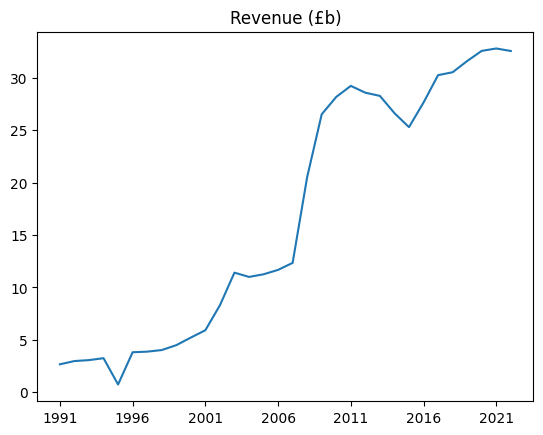

In [47]:
revenue = data['income_statement'].loc['revenue'][::-1]
# display(revenue)
(revenue/1e9).plot(title='Revenue (£b)')

In [69]:
# TODO: make a util
def metric_growth_df(data: pd.Series, name: str):
    df = pd.DataFrame({name: data})
    df['diff'] = df[name] - df[name].shift(1)
    df['growth'] = 100 * df['diff'] / df[name].shift(1)
    return df

<AxesSubplot: title={'center': 'Revenue Growth last 10 (%)'}>

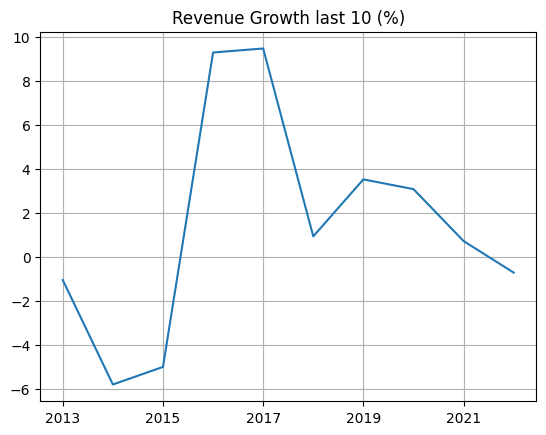

In [71]:
# sort by year ascending
rev = data['income_statement'].loc['revenue'][::-1]

rev_growth = metric_growth_df(rev, 'revenue')
rev_growth_last_10yr = rev_growth[-10:]
rev_growth_last_10yr.growth.plot(grid=True, title='Revenue Growth last 10 (%)')

<AxesSubplot: title={'center': 'Gross Margin Growth last 10 (%)'}>

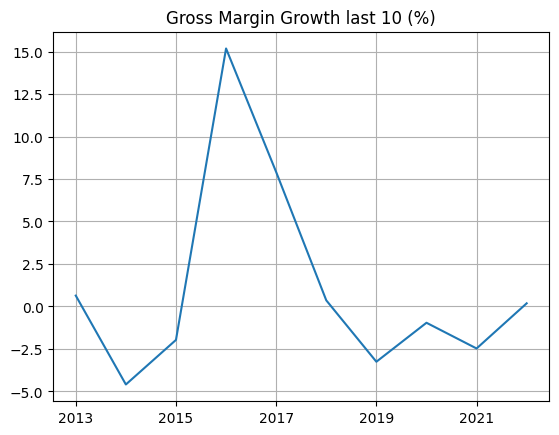

In [72]:
# sort by year ascending
gross_margin = data['income_statement'].loc['grossProfit'][::-1]
gm_growth = metric_growth_df(gross_margin, 'gross_margin')
# display(gm_growth)
gm_growth_last_10yr = gm_growth[-10:]
gm_growth_last_10yr.growth.plot(grid=True, title='Gross Margin Growth last 10 (%)')

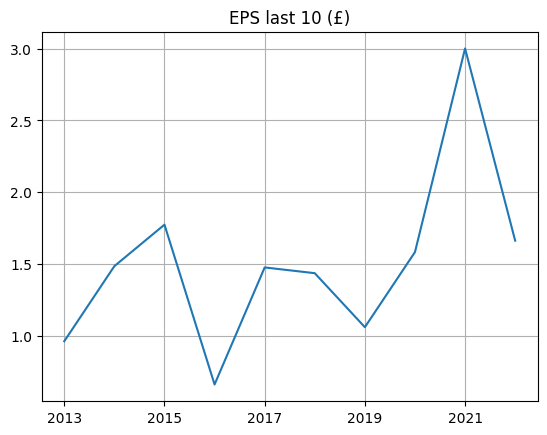

In [76]:
# sort by year ascending
eps = data['income_statement'].loc['eps'][::-1]
eps_last_10yr = eps[-10:]
eps_last_10yr.plot(grid=True, title='EPS last 10 (£)')

eps_growth = metric_growth_df(eps, 'eps')
# display(eps_growth)
eps_growth_last_10yr = eps_growth[-10:]
# eps_growth_last_10yr.growth.plot(grid=True, title='EPS Growth last 10 (%)')

In [86]:
total_revenue = data['income_statement']['2022'].revenue
cost_and_expenses = data['income_statement']['2022'].costAndExpenses
da = data['income_statement']['2022'].depreciationAndAmortization
interest = data['income_statement']['2022'].interestIncome - data['income_statement']['2022'].interestExpense
ebit = total_revenue - cost_and_expenses
display(ebit)

ebitda = ebit - interest
display(ebitda)

3354000000

3672000000

In [82]:
data['income_statement']['2022']

reportedCurrency                                   GBP
cik                                               None
fillingDate                                 2022-09-30
acceptedDate                                2022-09-30
revenue                                    32551000000
costOfRevenue                              26513000000
grossProfit                                 6038000000
grossProfitRatio                              0.185494
researchAndDevelopmentExpenses                     0.0
generalAndAdministrativeExpenses             323000000
sellingAndMarketingExpenses                 2021000000
sellingGeneralAndAdministrativeExpenses     2344000000
otherExpenses                                340000000
operatingExpenses                           2684000000
costAndExpenses                            29197000000
interestIncome                               116000000
interestExpense                              434000000
depreciationAndAmortization                  660000000
ebitda    